### Dimension Reduction Task02
- 뇌암 유전자 발현 데이터 세트를 회귀 분석 하는모델

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/brain_cancer.csv', low_memory=False)
c_df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


In [3]:
c_df.type.value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

In [14]:
# c_df.isna().sum().sum()
# c_df.duplicated().sum()

0

In [4]:
from sklearn.preprocessing import LabelEncoder

columns = ['type']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    c_df[column] = result
    encoders[column] = encoder.classes_

print(encoders)

{'type': array(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal',
       'pilocytic_astrocytoma'], dtype=object)}


In [5]:
c_df = c_df.drop(labels=['samples'], axis=1)

In [30]:
# c_df.corr()['type'].sort_values(ascending=False)[1:]

229110_at      0.779435
220448_at      0.738721
219287_at      0.730204
222857_s_at    0.729333
227365_at      0.727179
                 ...   
236915_at     -0.721051
1552269_at    -0.722630
222581_at     -0.737369
239515_at     -0.740559
230763_at     -0.757356
Name: type, Length: 54675, dtype: float64

In [ ]:
# from statsmodels.api import OLS

# features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

# model = OLS(targets, features)
# print(model.fit().summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [24]:
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.5, random_state=124)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
display(train_df)
display(test_df)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,12.111837,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,5.254970,...,12.124897,13.796883,13.713140,5.405370,4.971722,3.972822,3.713295,4.540301,4.547086,1
1,11.135251,8.511166,6.638218,8.880642,5.112464,7.445098,7.734408,5.625772,5.009570,6.626782,...,12.745919,14.372789,14.183690,4.986244,4.592166,3.793103,3.750254,4.614216,4.721573,3
2,12.461089,7.676462,7.244519,9.676867,3.904301,7.467139,6.585188,7.061578,5.284843,5.177349,...,10.808249,13.593281,13.616164,5.201016,4.850920,3.887500,3.596379,4.518055,4.526295,0
3,13.141872,8.672800,7.120124,9.530811,4.267053,7.970733,6.551977,6.983372,6.272518,5.242514,...,11.047336,13.603186,13.281196,5.350546,5.203219,4.001423,3.616770,4.536090,4.560195,0
4,12.965147,8.438010,7.058539,9.401396,4.307017,7.983527,7.241787,6.485690,6.027410,5.789550,...,11.211151,13.442829,13.384436,5.273008,5.044398,3.970774,3.574067,4.606556,4.569473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,12.506887,8.855623,8.773573,8.574727,4.131700,7.666310,7.545845,5.972713,5.907529,6.405782,...,11.722468,13.879072,13.529125,5.028780,4.593898,3.765165,3.534483,4.734137,4.563795,0
61,11.058354,7.938873,6.606813,8.665940,4.308291,7.267153,6.485517,6.625708,4.966375,6.172580,...,11.760554,14.033720,13.866105,5.190382,4.625670,3.895986,3.555475,4.529254,4.541289,3
62,12.397722,8.843524,8.825100,8.551541,5.002072,8.547894,6.920827,5.738159,6.383309,5.229208,...,12.699932,14.286779,14.088950,4.932377,4.700205,3.952850,3.678112,5.018501,4.704779,4
63,11.335461,9.211290,6.222515,8.289107,4.505269,7.511797,7.830174,5.641765,5.068197,5.208774,...,12.980167,14.241468,14.118189,5.167036,4.611306,3.690199,3.803287,4.651539,4.519167,2


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,12.461818,8.295224,7.003408,9.795838,4.645302,7.756395,6.548908,6.229569,6.167943,5.225314,...,11.162672,13.571743,13.250637,5.202252,4.988121,3.975900,3.640148,4.422600,4.954226,1
1,12.708640,9.544861,7.020486,8.371522,6.756560,7.961590,6.818879,5.650410,5.575796,4.863261,...,11.265540,13.584379,13.406214,5.091770,4.763728,3.910412,3.755138,4.811672,4.656775,0
2,12.884266,8.980535,8.262888,8.679983,4.226454,8.381291,6.538297,7.286576,5.058420,5.728124,...,11.995039,13.865692,13.781953,5.024036,4.714226,3.675778,3.671138,4.550725,4.050006,0
3,11.785211,8.956134,9.157426,8.985909,4.024344,9.280761,6.165860,5.601284,8.448604,5.137368,...,11.363759,13.763484,13.331008,4.970314,4.639441,3.842123,3.632589,4.718510,4.383670,1
4,11.186476,8.752716,6.241700,8.837207,4.299205,7.157191,7.793448,7.186723,5.134119,5.242819,...,12.083052,13.923105,13.690567,5.402083,4.851863,3.877870,3.742807,4.849433,4.701237,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,12.110998,9.264432,8.357963,9.456464,4.623587,7.260081,6.993480,6.649027,6.069263,5.147576,...,11.461236,13.478750,13.479429,5.389428,4.992476,3.935522,3.490165,4.571429,4.382826,1
61,12.775860,9.266838,6.966860,8.499160,5.279069,7.726775,6.802782,6.028793,5.545895,5.179065,...,12.145282,14.131942,13.797764,5.179305,4.845109,3.988886,3.778867,4.970350,4.899949,0
62,11.724060,9.379596,6.516140,8.590647,4.373073,7.322896,6.937747,5.744390,5.081055,5.117691,...,12.253819,13.795750,13.681170,5.055635,4.771619,4.054617,3.809534,4.834907,4.619506,2
63,12.868001,8.306546,8.592515,9.546182,4.469763,8.966850,6.066862,6.256690,8.244486,5.138978,...,11.531124,13.530296,13.342786,5.334696,5.070050,3.908254,3.683963,4.400800,4.743498,1


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(train_df.iloc[:, :-1], train_df.iloc[:, -1])
lda_test = lda.fit_transform(test_df.iloc[:, :-1], test_df.iloc[:, -1])

print(lda_train.shape, lda_test.shape)

(65, 1) (65, 1)


In [26]:
lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = train_df['type']

lda_columns = [f'lda{i + 1}' for i in range(lda_test.shape[1])]
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
lda_test_df.loc[:, 'target'] = test_df['type']

In [27]:
display(lda_train_df)
display(lda_test_df)

,lda1,target
0,-1.908863,1
1,-3.078508,3
2,2.380686,0
3,3.479795,0
4,2.285434,0
...,...,...
60,2.378470,0
61,-2.874723,3
62,-2.643906,4
63,-0.939434,2


,lda1,target
0,-0.696555,1
1,-0.669111,0
2,2.614375,0
3,1.639089,1
4,-2.214683,2
...,...,...
60,-0.382324,1
61,1.059957,0
62,-1.471372,2
63,0.684444,1


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

features, targets = lda_train_df.iloc[:, :-1], lda_train_df.iloc[:, -1]
parameters = {'max_depth': [2,3,4], 'min_samples_split': [10, 50, 100]}

rfc = RandomForestClassifier()
# import sklearn
# sklearn.metrics.SCORERS.keys()
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [29]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 2, 'min_samples_split': 10}",0.600000,3
1,"{'max_depth': 2, 'min_samples_split': 50}",0.353846,4
2,"{'max_depth': 2, 'min_samples_split': 100}",0.353846,4
3,"{'max_depth': 3, 'min_samples_split': 10}",0.630769,1
4,"{'max_depth': 3, 'min_samples_split': 50}",0.353846,4
5,"{'max_depth': 3, 'min_samples_split': 100}",0.353846,4
6,"{'max_depth': 4, 'min_samples_split': 10}",0.615385,2
7,"{'max_depth': 4, 'min_samples_split': 50}",0.353846,4
8,"{'max_depth': 4, 'min_samples_split': 100}",0.353846,4


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    # auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


오차 행렬
[[22  1  0  0  0]
 [ 6  9  1  1  0]
 [ 0  2  5  4  0]
 [ 0  0  0  7  0]
 [ 1  6  0  0  0]]
정확도: 0.6615, 정밀도: 0.5351, 재현율: 0.5881, F1: 0.5371
################################################################################


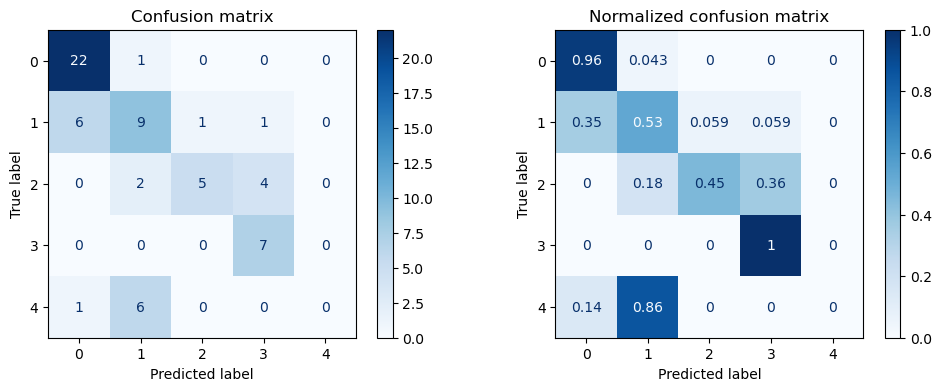

In [31]:
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.iloc[:, -1]

rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)
get_evaluation(y_test, prediction, rfc, X_test)

In [32]:
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, 1:], c_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.5, random_state=124)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
display(train_df)
display(test_df)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,12.111837,9.909101,8.590495,9.590659,4.558298,7.089286,6.925450,6.184260,5.697576,5.254970,...,12.124897,13.796883,13.713140,5.405370,4.971722,3.972822,3.713295,4.540301,4.547086,1
1,11.135251,8.511166,6.638218,8.880642,5.112464,7.445098,7.734408,5.625772,5.009570,6.626782,...,12.745919,14.372789,14.183690,4.986244,4.592166,3.793103,3.750254,4.614216,4.721573,3
2,12.461089,7.676462,7.244519,9.676867,3.904301,7.467139,6.585188,7.061578,5.284843,5.177349,...,10.808249,13.593281,13.616164,5.201016,4.850920,3.887500,3.596379,4.518055,4.526295,0
3,13.141872,8.672800,7.120124,9.530811,4.267053,7.970733,6.551977,6.983372,6.272518,5.242514,...,11.047336,13.603186,13.281196,5.350546,5.203219,4.001423,3.616770,4.536090,4.560195,0
4,12.965147,8.438010,7.058539,9.401396,4.307017,7.983527,7.241787,6.485690,6.027410,5.789550,...,11.211151,13.442829,13.384436,5.273008,5.044398,3.970774,3.574067,4.606556,4.569473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,12.506887,8.855623,8.773573,8.574727,4.131700,7.666310,7.545845,5.972713,5.907529,6.405782,...,11.722468,13.879072,13.529125,5.028780,4.593898,3.765165,3.534483,4.734137,4.563795,0
61,11.058354,7.938873,6.606813,8.665940,4.308291,7.267153,6.485517,6.625708,4.966375,6.172580,...,11.760554,14.033720,13.866105,5.190382,4.625670,3.895986,3.555475,4.529254,4.541289,3
62,12.397722,8.843524,8.825100,8.551541,5.002072,8.547894,6.920827,5.738159,6.383309,5.229208,...,12.699932,14.286779,14.088950,4.932377,4.700205,3.952850,3.678112,5.018501,4.704779,4
63,11.335461,9.211290,6.222515,8.289107,4.505269,7.511797,7.830174,5.641765,5.068197,5.208774,...,12.980167,14.241468,14.118189,5.167036,4.611306,3.690199,3.803287,4.651539,4.519167,2


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,type
0,12.461818,8.295224,7.003408,9.795838,4.645302,7.756395,6.548908,6.229569,6.167943,5.225314,...,11.162672,13.571743,13.250637,5.202252,4.988121,3.975900,3.640148,4.422600,4.954226,1
1,12.708640,9.544861,7.020486,8.371522,6.756560,7.961590,6.818879,5.650410,5.575796,4.863261,...,11.265540,13.584379,13.406214,5.091770,4.763728,3.910412,3.755138,4.811672,4.656775,0
2,12.884266,8.980535,8.262888,8.679983,4.226454,8.381291,6.538297,7.286576,5.058420,5.728124,...,11.995039,13.865692,13.781953,5.024036,4.714226,3.675778,3.671138,4.550725,4.050006,0
3,11.785211,8.956134,9.157426,8.985909,4.024344,9.280761,6.165860,5.601284,8.448604,5.137368,...,11.363759,13.763484,13.331008,4.970314,4.639441,3.842123,3.632589,4.718510,4.383670,1
4,11.186476,8.752716,6.241700,8.837207,4.299205,7.157191,7.793448,7.186723,5.134119,5.242819,...,12.083052,13.923105,13.690567,5.402083,4.851863,3.877870,3.742807,4.849433,4.701237,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,12.110998,9.264432,8.357963,9.456464,4.623587,7.260081,6.993480,6.649027,6.069263,5.147576,...,11.461236,13.478750,13.479429,5.389428,4.992476,3.935522,3.490165,4.571429,4.382826,1
61,12.775860,9.266838,6.966860,8.499160,5.279069,7.726775,6.802782,6.028793,5.545895,5.179065,...,12.145282,14.131942,13.797764,5.179305,4.845109,3.988886,3.778867,4.970350,4.899949,0
62,11.724060,9.379596,6.516140,8.590647,4.373073,7.322896,6.937747,5.744390,5.081055,5.117691,...,12.253819,13.795750,13.681170,5.055635,4.771619,4.054617,3.809534,4.834907,4.619506,2
63,12.868001,8.306546,8.592515,9.546182,4.469763,8.966850,6.066862,6.256690,8.244486,5.138978,...,11.531124,13.530296,13.342786,5.334696,5.070050,3.908254,3.683963,4.400800,4.743498,1


In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(65, 5) (65, 5)


In [40]:
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['type']

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['type']

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
parameters = {'max_depth': [5, 10, 20], 'min_samples_split': [10, 50, 100]}

rfc = RandomForestClassifier()
# import sklearn
# sklearn.metrics.SCORERS.keys()
g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, return_train_score=True, scoring='accuracy')
g_rfc.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [42]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.923077,1
1,"{'max_depth': 5, 'min_samples_split': 50}",0.353846,4
2,"{'max_depth': 5, 'min_samples_split': 100}",0.353846,4
3,"{'max_depth': 10, 'min_samples_split': 10}",0.892308,3
4,"{'max_depth': 10, 'min_samples_split': 50}",0.353846,4
5,"{'max_depth': 10, 'min_samples_split': 100}",0.353846,4
6,"{'max_depth': 20, 'min_samples_split': 10}",0.923077,1
7,"{'max_depth': 20, 'min_samples_split': 50}",0.353846,4
8,"{'max_depth': 20, 'min_samples_split': 100}",0.353846,4
